In [111]:
# Import required libraries and dependencies
import pandas as pd
import hvplot.pandas
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [7]:
# Load the data into a Pandas DataFrame
df_market_data = pd.read_csv(
    "Resources/crypto_market_data.csv",
    index_col="coin_id")

# Display sample data
df_market_data.head(10)

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,1.08388,7.60278,6.57509,7.67258,-3.25185,83.51840,37.51761
ethereum,0.22392,10.38134,4.80849,0.13169,-12.88890,186.77418,101.96023
tether,-0.21173,0.04935,0.00640,-0.04237,0.28037,-0.00542,0.01954
ripple,-0.37819,-0.60926,2.24984,0.23455,-17.55245,39.53888,-16.60193
bitcoin-cash,2.90585,17.09717,14.75334,15.74903,-13.71793,21.66042,14.49384
binancecoin,2.10423,12.85511,6.80688,0.05865,36.33486,155.61937,69.69195
chainlink,-0.23935,20.69459,9.30098,-11.21747,-43.69522,403.22917,325.13186
cardano,0.00322,13.99302,5.55476,10.10553,-22.84776,264.51418,156.09756
litecoin,-0.06341,6.60221,7.28931,1.21662,-17.23960,27.49919,-12.66408


In [73]:
pip install matplotlib

In [8]:
# Generate summary statistics
df_market_data.describe()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
count,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000
mean,-0.269686,4.497147,0.185787,1.545693,-0.094119,236.537432,347.667956
std,2.694793,6.375218,8.376939,26.344218,47.365803,435.225304,1247.842884
min,-13.527860,-6.094560,-18.158900,-34.705480,-44.822480,-0.392100,-17.567530
25%,-0.608970,0.047260,-5.026620,-10.438470,-25.907990,21.660420,0.406170
50%,-0.063410,3.296410,0.109740,-0.042370,-7.544550,83.905200,69.691950
75%,0.612090,7.602780,5.510740,4.578130,0.657260,216.177610,168.372510
max,4.840330,20.694590,24.239190,140.795700,223.064370,2227.927820,7852.089700


In [9]:
# Plot your data to see what's in your DataFrame
df_market_data.hvplot.line(
    width=800,
    height=400,
    rot=90
)

:NdOverlay   [Variable]
   :Curve   [coin_id]   (value)

---

### Prepare the Data

In [12]:
# Use the `StandardScaler()` module from scikit-learn to normalize the data from the CSV file
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_market_data)

In [17]:
print(df_market_data.index)

Index(['bitcoin', 'ethereum', 'tether', 'ripple', 'bitcoin-cash',
       'binancecoin', 'chainlink', 'cardano', 'litecoin', 'bitcoin-cash-sv',
       'crypto-com-chain', 'usd-coin', 'eos', 'monero', 'tron', 'tezos', 'okb',
       'stellar', 'cosmos', 'cdai', 'neo', 'wrapped-bitcoin', 'leo-token',
       'huobi-token', 'nem', 'binance-usd', 'iota', 'vechain', 'zcash',
       'theta-token', 'dash', 'ethereum-classic', 'ethlend', 'maker', 'havven',
       'omisego', 'celsius-degree-token', 'ontology', 'ftx-token', 'true-usd',
       'digibyte'],
      dtype='object', name='coin_id')


In [21]:
# Create a DataFrame with the scaled data
df_scaled = pd.DataFrame(df_scaled, columns=df_market_data.columns, index=df_market_data.index)

# Copy the crypto names from the original DataFrame



# Set the coin_id column as index
print(df_market_data.index)

# Display the scaled DataFrame
df_scaled.head()

Index(['bitcoin', 'ethereum', 'tether', 'ripple', 'bitcoin-cash',
       'binancecoin', 'chainlink', 'cardano', 'litecoin', 'bitcoin-cash-sv',
       'crypto-com-chain', 'usd-coin', 'eos', 'monero', 'tron', 'tezos', 'okb',
       'stellar', 'cosmos', 'cdai', 'neo', 'wrapped-bitcoin', 'leo-token',
       'huobi-token', 'nem', 'binance-usd', 'iota', 'vechain', 'zcash',
       'theta-token', 'dash', 'ethereum-classic', 'ethlend', 'maker', 'havven',
       'omisego', 'celsius-degree-token', 'ontology', 'ftx-token', 'true-usd',
       'digibyte'],
      dtype='object', name='coin_id')


,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637
ethereum,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352
tether,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061
ripple,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546
bitcoin-cash,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317


---

### Find the Best Value for k Using the Original Scaled DataFrame.

In [22]:
# Create a list with the number of k-values from 1 to 11
k_values = range(1, 12)

In [25]:
# Create an empty list to store the inertia values
inertia = []

# Create a for loop to compute the inertia with each possible value of k
# Inside the loop:
# 1. Create a KMeans model using the loop counter for the n_clusters
# 2. Fit the model to the data using `df_market_data_scaled`
# 3. Append the model.inertia_ to the inertia list
for k in k_values:
      kmeans = KMeans(n_clusters=k, random_state=0)
      kmeans.fit(df_scaled)
      inertia.append(kmeans.inertia_)




C:\Users\derej\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\derej\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\derej\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\derej\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Window

In [28]:
# Create a dictionary with the data to plot the Elbow curve
elbow_data = pd.DataFrame({'k': k_values, 'inertia': inertia})

# Create a DataFrame with the data to plot the Elbow curve
elbow_plot = elbow_data.hvplot.line(
    x='k', 
    y='inertia', 
    title='Elbow Curve', 
    xlabel='Number of Clusters (k)', 
    ylabel='Inertia', 
    xticks=list(k_values)  # Convert range to list
)
elbow_plot

:Curve   [k]   (inertia)

In [29]:
# Plot a line chart with all the inertia values computed with
# the different values of k to visually identify the optimal value for k.
elbow_plot = elbow_data.hvplot.line(
    x='k',
    y='inertia',
    title='Elbow Curve',
    xlabel='Number of Clusters (k)',
    ylabel='Inertia',
    xticks=list(k_values)  # Ensure xticks are in the correct format
)

# Display the plot
elbow_plot

:Curve   [k]   (inertia)

#### Answer the following question: 

**Question:** What is the best value for `k`?

**Answer: 5 is the best value for `k` but it could be 7 and 8 as well

---

### Cluster Cryptocurrencies with K-means Using the Original Scaled DataFrame

In [42]:
# Initialize the K-Means model using the best value for k
optimal_k = 5
kmeans_model = KMeans(n_clusters=optimal_k, random_state=1)


In [44]:
# Fit the K-Means model using the scaled DataFrame
kmeans_model.fit(df_scaled)

C:\Users\derej\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=5, random_state=1)

In [45]:
# Predict the clusters to group the cryptocurrencies using the scaled DataFrame
cluster_labels = kmeans_model.predict(df_scaled)


# Print the resulting array of cluster values.
print(cluster_labels)

[2 2 0 0 2 2 2 2 2 0 0 0 0 2 0 2 0 0 2 0 0 2 0 0 0 0 0 0 2 4 0 0 3 0 0 0 1
 0 0 0 0]


In [46]:
# Create a copy of the scaled DataFrame
df_clustered = df_scaled.copy()

In [47]:
# Add a new column to the copy of the scaled DataFrame with the predicted clusters
df_clustered['Cluster'] = cluster_labels

# Display the copy of the scaled DataFrame
df_clustered.head()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y,Cluster
coin_id,,,,,,,,
bitcoin,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637,2
ethereum,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352,2
tether,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061,0
ripple,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546,0
bitcoin-cash,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317,2


In [48]:
# Create a scatter plot using hvPlot by setting
# `x="price_change_percentage_24h"` and `y="price_change_percentage_7d"`.
# Color the graph points with the labels found using K-Means and
# add the crypto name in the `hover_cols` parameter to identify
# the cryptocurrency represented by each data point.
scatter_plot = df_clustered.hvplot.scatter(
    x='price_change_percentage_24h',
    y='price_change_percentage_7d',
    c='Cluster', 
    colormap='viridis',  
    hover_cols=['coin_id'],  
    title='Cryptocurrency Clusters',
    xlabel='24h Price Change (%)',
    ylabel='7d Price Change (%)',
    width=800,
    height=600
)

# Displaying the plot
scatter_plot

:Scatter   [price_change_percentage_24h]   (price_change_percentage_7d,Cluster,coin_id)

---

### Optimize Clusters with Principal Component Analysis.

In [49]:
# Create a PCA model instance and set `n_components=3`.
pca = PCA(n_components=3)


In [56]:
# Use the PCA model with `fit_transform` to reduce the original scaled DataFrame
# down to three principal components.
crypto_pca = pca.fit_transform(df_scaled)
crypto_pca_df = pd.DataFrame(crypto_pca, index=df_scaled.index, columns=['PC1', 'PC2', 'PC3'])
# View the scaled PCA data
print(crypto_pca_df.head())

                   PC1       PC2       PC3
coin_id                                   
bitcoin      -0.600667  0.842760  0.461595
ethereum     -0.458261  0.458466  0.952877
tether       -0.433070 -0.168126 -0.641752
ripple       -0.471835 -0.222660 -0.479053
bitcoin-cash -1.157800  2.041209  1.859715


In [57]:
# Retrieve the explained variance to determine how much information
# can be attributed to each principal component.
explained_variance = pca.explained_variance_ratio_
# Display explained variance
print(explained_variance)

[0.3719856  0.34700813 0.17603793]


#### Answer the following question: 

**Question:** What is the total explained variance of the three principal components?

**Answer: 0.3719856 + 0.34700813 + 0.17603793 = 089503166

In [63]:
# Create a new DataFrame with the PCA data.
df_crypto_pca = pd.DataFrame(
    data=crypto_pca,
    columns=['PC1', 'PC2', 'PC3'],
    index=df_market_data.index 
)
# Copy the crypto names from the original scaled DataFrame
# Set the coin_id column as index
# Display the scaled PCA DataFrame
print(df_crypto_pca.head())

                   PC1       PC2       PC3
coin_id                                   
bitcoin      -0.600667  0.842760  0.461595
ethereum     -0.458261  0.458466  0.952877
tether       -0.433070 -0.168126 -0.641752
ripple       -0.471835 -0.222660 -0.479053
bitcoin-cash -1.157800  2.041209  1.859715


---

### Find the Best Value for k Using the Scaled PCA DataFrame

In [64]:
# Create a list with the number of k-values from 1 to 11
k_values = range(1, 12)

In [66]:
# Create an empty list to store the inertia values
inertia = []

# Create a for loop to compute the inertia with each possible value of k
# Inside the loop:
# 1. Create a KMeans model using the loop counter for the n_clusters
# 2. Fit the model to the data using `df_market_data_pca`
# 3. Append the model.inertia_ to the inertia list
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=1)
    kmeans.fit(df_crypto_pca)
    inertia.append(kmeans.inertia_)

C:\Users\derej\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\derej\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\derej\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\derej\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Window

In [68]:
# Create a dictionary with the data to plot the Elbow curve

# Create a DataFrame with the data to plot the Elbow curve
df_crypto_pca = pd.DataFrame(df_crypto_pca, columns=['PC1', 'PC2', 'PC3'], index=df_market_data.index)

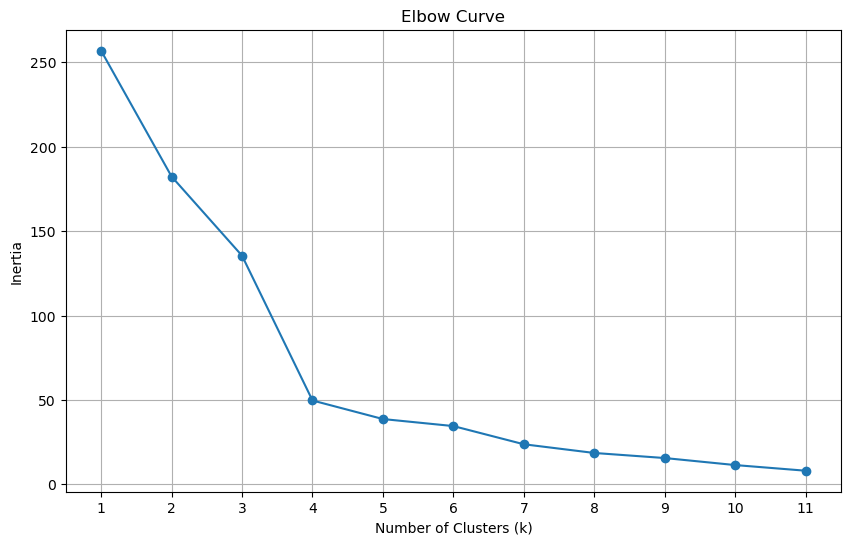

In [74]:
# Plot a line chart with all the inertia values computed with
# the different values of k to visually identify the optimal value for k.
plt.figure(figsize=(10, 6))
plt.plot(k_values, inertia, marker='o')
plt.title('Elbow Curve')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.xticks(k_values)
plt.grid(True)
plt.show()

#### Answer the following questions: 

* **Question:** What is the best value for `k` when using the PCA data?

  * **Answer: 5, 7 and 8


* **Question:** Does it differ from the best k value found using the original data?

  * **Answer: some how simmilar 

### Cluster Cryptocurrencies with K-means Using the Scaled PCA DataFrame

In [76]:
# Initialize the K-Means model using the best value for k
optimal_k = 5
kmeans_model = KMeans(n_clusters=optimal_k, random_state=1)


In [78]:
# Fit the K-Means model using the PCA data
kmeans_model.fit(df_crypto_pca)

C:\Users\derej\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=5, random_state=1)

In [79]:
# Predict the clusters to group the cryptocurrencies using the scaled PCA DataFrame
cluster_labels = kmeans_model.predict(df_crypto_pca)

# Print the resulting array of cluster values.
print(cluster_labels)

[2 2 0 0 2 2 2 2 2 0 0 0 0 2 0 0 0 0 2 0 0 2 0 0 4 0 0 0 2 4 0 0 3 0 0 4 1
 0 0 0 0]


In [80]:
# Create a copy of the scaled PCA DataFrame
df_pca_components = pd.DataFrame(
    data=crypto_pca,
    columns=['PC1', 'PC2', 'PC3'],
    index=df_market_data.index
)


# Add a new column to the copy of the PCA DataFrame with the predicted clusters
df_pca_components['Cluster'] = cluster_labels

# Display the copy of the scaled PCA DataFrame
print(df_pca_components.head())

                   PC1       PC2       PC3  Cluster
coin_id                                            
bitcoin      -0.600667  0.842760  0.461595        2
ethereum     -0.458261  0.458466  0.952877        2
tether       -0.433070 -0.168126 -0.641752        0
ripple       -0.471835 -0.222660 -0.479053        0
bitcoin-cash -1.157800  2.041209  1.859715        2


In [81]:
# Create a scatter plot using hvPlot by setting
# `x="PC1"` and `y="PC2"`.
# Color the graph points with the labels found using K-Means and
# add the crypto name in the `hover_cols` parameter to identify
# the cryptocurrency represented by each data point.
scatter_plot = df_pca_components.hvplot.scatter(
    x='PC1',
    y='PC2',
    c='Cluster',
    hover_cols=['coin_id'],
    title='Cryptocurrency Clusters Based on PCA Components'
)

scatter_plot

:Scatter   [PC1]   (PC2,Cluster,coin_id)

### Visualize and Compare the Results

In this section, you will visually analyze the cluster analysis results by contrasting the outcome with and without using the optimization techniques.

C:\Users\derej\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\derej\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\derej\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\derej\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Window

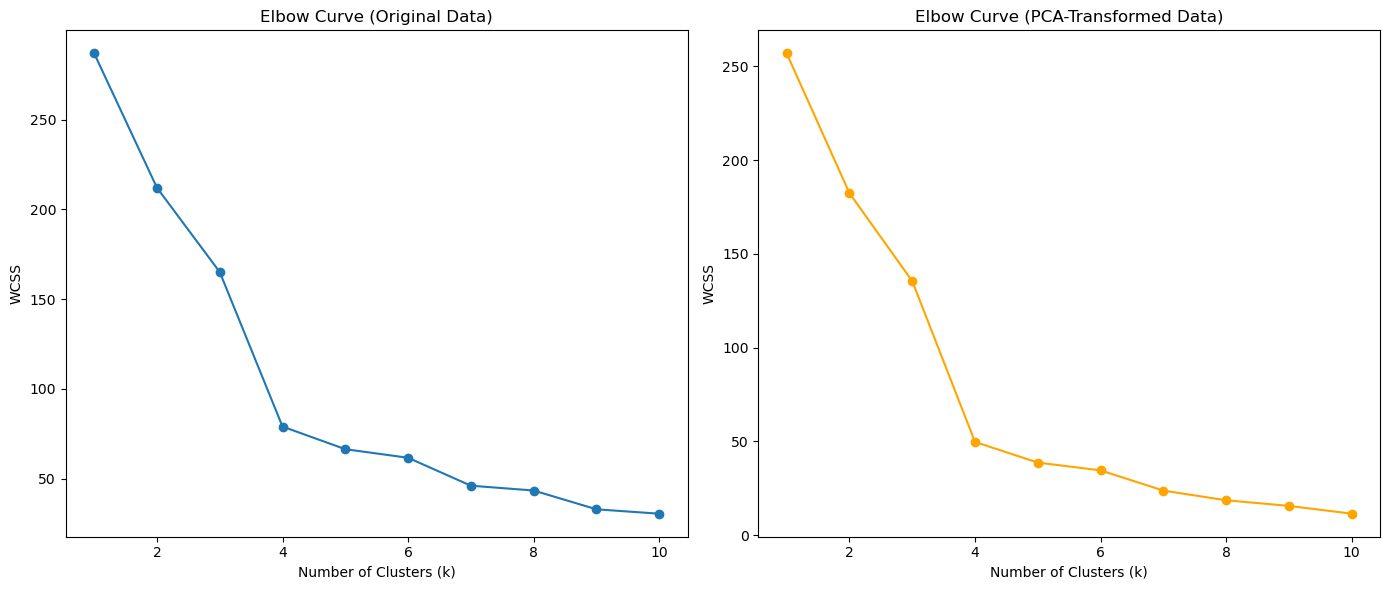

In [90]:
# Composite plot to contrast the Elbow curves
def compute_wcss(data):
    wcss = []
    for k in range(1, 11):
        kmeans = KMeans(n_clusters=k, random_state=1)
        kmeans.fit(data)
        wcss.append(kmeans.inertia_)
    return wcss
wcss_original = compute_wcss(df_scaled)
wcss_pca = compute_wcss(df_crypto_pca)

plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.plot(range(1, 11), wcss_original, marker='o')
plt.title('Elbow Curve (Original Data)')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('WCSS')

plt.subplot(1, 2, 2)
plt.plot(range(1, 11), wcss_pca, marker='o', color='orange')
plt.title('Elbow Curve (PCA-Transformed Data)')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('WCSS')

plt.tight_layout()
plt.show()

In [110]:
# Composite plot to contrast the clusters


scatter_plot = df_clustered.hvplot.scatter(
    x='price_change_percentage_24h',
    y='price_change_percentage_7d',
    c='Cluster',
    colormap='viridis',
    hover_cols=['coin_id', 'market_cap', 'volume'],
    title='Cryptocurrency Clusters',
    xlabel='24h Price Change (%)',
    ylabel='7d Price Change (%)',
    width=800,
    height=600
)
scatter_plot

:Scatter   [price_change_percentage_24h]   (price_change_percentage_7d,Cluster,coin_id)

#### Answer the following question: 

  * **Question:** After visually analyzing the cluster analysis results, what is the impact of using fewer features to cluster the data using K-Means?

  * **Answer:** The impact of using ferew reatures are it will improved performance, Enhanced computational efficiency and mitigation of the Curse of dimensionality